# Deepseek-R1-Llama3 8B Distill - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
base_output_dir = r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\deepseekr1llama8b"
prompt_approaches = os.listdir(base_output_dir)

## Model Metrics

In [3]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(base_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:715: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


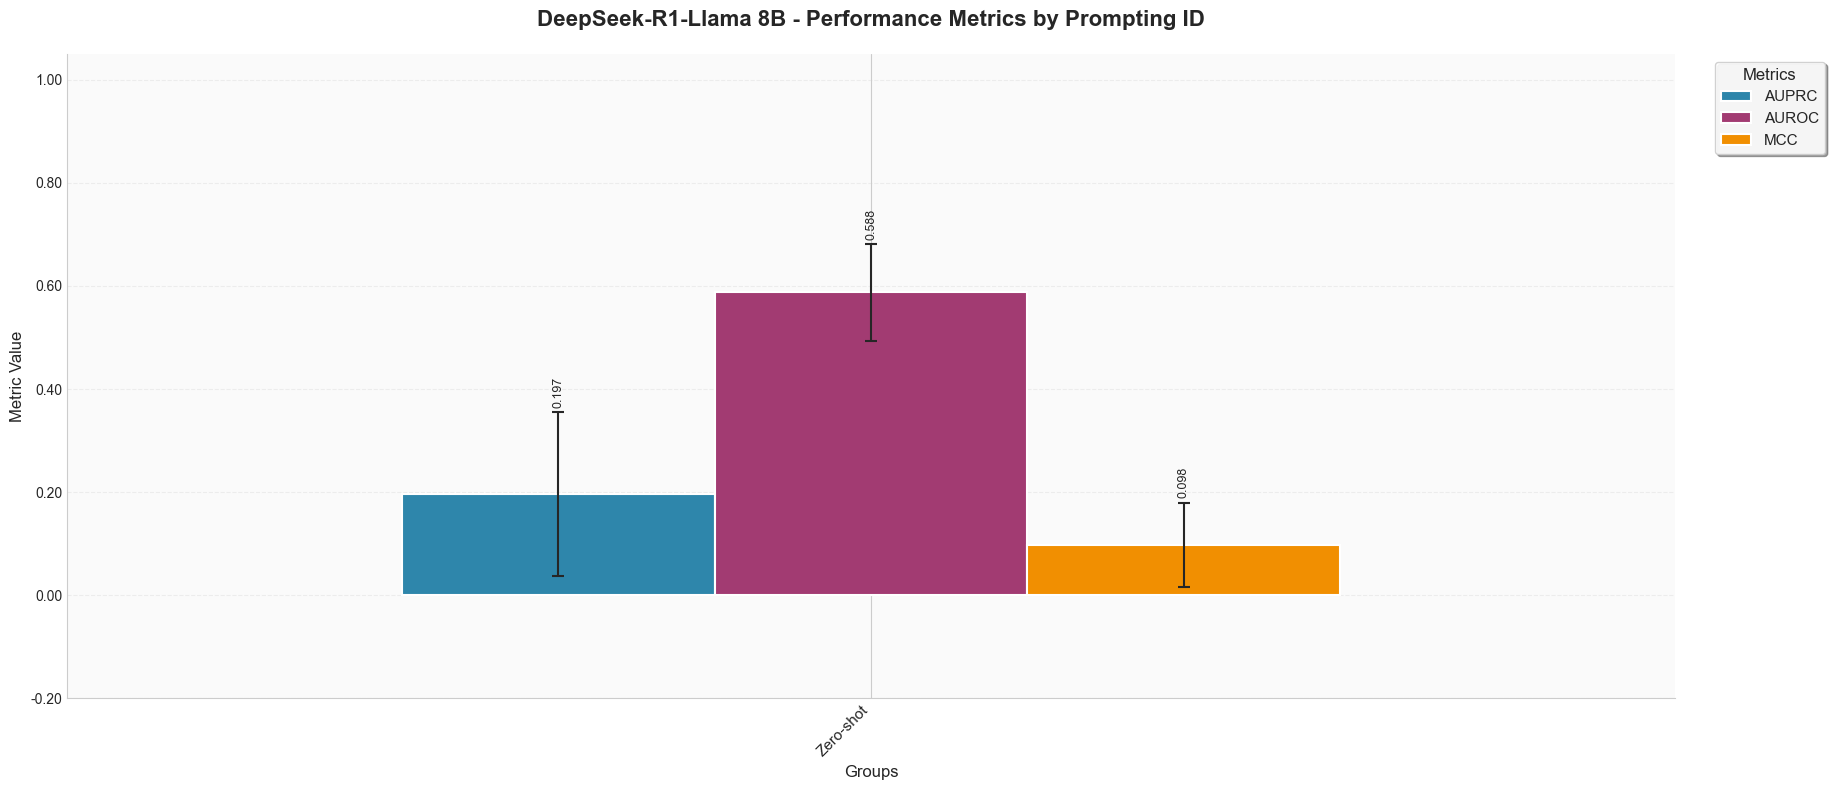

In [4]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="DeepSeek-R1-Llama 8B - ",
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:715: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


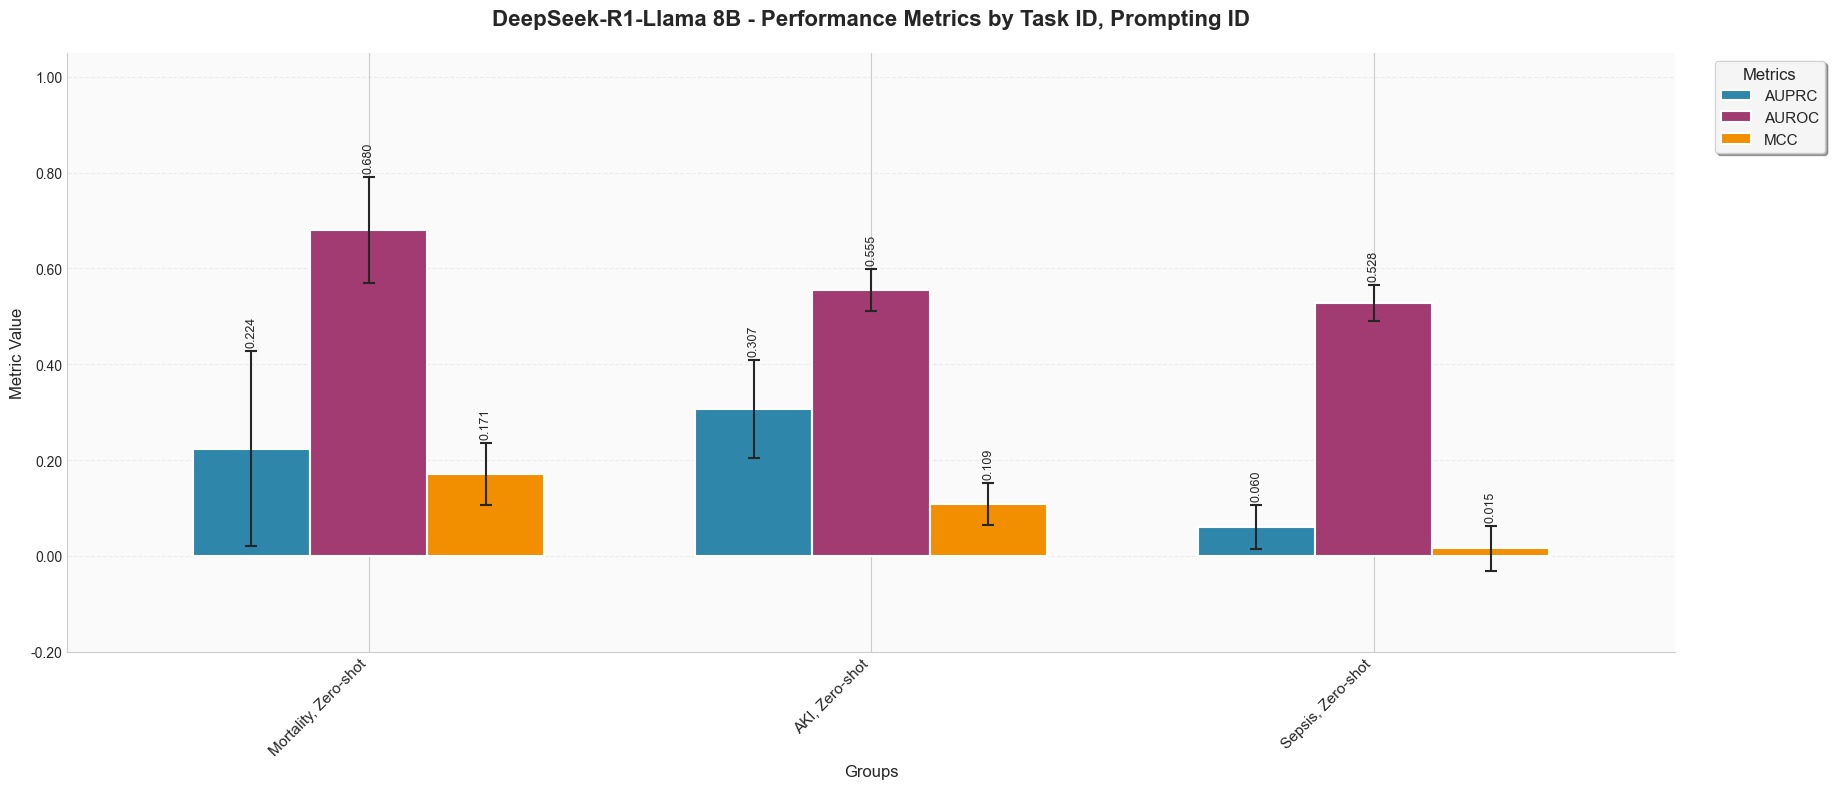

In [5]:
LLMAnalyzer.plot_metrics(
    df_results,
    group=["task_id", "prompting_id"],
    title_prefix="DeepSeek-R1-Llama 8B - ",
)

In [6]:
import ipywidgets as widgets
from IPython.display import display

Analysis of best prompting approach

In [7]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=prompt_approaches[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', options=('zhu_2024b_zero_shot',), style=DescriptionStyle(description_…

In [8]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\deepseekr1llama8b\zhu_2024b_zero_shot
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: eicu, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: hirid, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: miiv, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: eicu, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: hirid, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: hirid, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: aki, Dataset: miiv, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: eicu, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: hirid, Timestamp: 20250620_211315
Model Name: DeepseekR1Llama8b, Task: mortality, Dataset: miiv, Timestamp:

In [9]:
LLMAnalyzer.print_approach_summary(df_mdata)

,task,dataset,mean_inference_time,total_inference_time,mean_input_tokens,total_input_tokens,mean_output_tokens,total_output_tokens,positive_samples,negative_samples,total_samples,pos_neg_ratio
0,aki,eicu,22.15s,21800.44s,3293,3240489,741,729416,305,679,984,0.45
1,aki,hirid,22.82s,22411.05s,3293,3234095,774,759798,159,823,982,0.19
2,aki,miiv,22.44s,22079.14s,3293,3240503,755,743046,229,755,984,0.30
3,mortality,eicu,45.36s,4536.22s,7884,788438,1295,129544,7,93,100,0.08
4,mortality,hirid,48.29s,4828.94s,7888,788801,1380,138034,11,89,100,0.12
5,mortality,miiv,51.64s,5163.59s,7885,788471,1472,147175,12,88,100,0.14
6,sepsis,eicu,41.65s,40816.07s,3331,3264751,1385,1357289,47,933,980,0.05
7,sepsis,hirid,40.70s,39439.68s,3332,3228228,1368,1325567,73,896,969,0.08
8,sepsis,miiv,40.76s,40355.29s,3331,3297864,1341,1327922,25,965,990,0.03


In [10]:
metrics_report = cat_files['metrics_report_files'][0]
df_metrics = pd.read_json(metrics_report)
df_metrics

,model_id,task_id,dataset,run_id,prompting_id,metrics_summary
0,DeepseekR1Llama8b,mortality,eicu,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.747, 'auprc': 0.126, '..."
1,DeepseekR1Llama8b,mortality,hirid,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.552, 'auprc': 0.089, '..."
2,DeepseekR1Llama8b,mortality,miiv,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.741, 'auprc': 0.457, '..."
3,DeepseekR1Llama8b,aki,eicu,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.584, 'auprc': 0.401, '..."
4,DeepseekR1Llama8b,aki,hirid,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.504, 'auprc': 0.198, '..."
5,DeepseekR1Llama8b,aki,miiv,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.577, 'auprc': 0.322, '..."
6,DeepseekR1Llama8b,sepsis,eicu,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.514, 'auprc': 0.045, '..."
7,DeepseekR1Llama8b,sepsis,hirid,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.5710000000000001, 'aup..."
8,DeepseekR1Llama8b,sepsis,miiv,20250620211315,zhu_2024b_zero_shot_preprocessor,"{'overall': {'auroc': 0.5, 'auprc': 0.023, 'no..."


In [11]:
# Save metrics to results.json using the LLMAnalyzer method
added_count, updated_count = LLMAnalyzer.save_metrics_to_results_json(
    metrics_report_path=metrics_report,
    results_json_path="../docs/results.json"
)

Adding new record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preprocessor', run_id='20250620_211315'
Updating existing record: model_id='DeepseekR1Llama8b', prompting_id='zhu_2024b_zero_shot_preproc